# PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider, Output, widgets
# from IPython.core.display import display
from IPython.display import display
import re

from skimpy import clean_columns
# import requests
# import geopy
# from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

# df0

In [2]:
df0 =pd.read_json('as24_cars.json')

In [3]:
df0.sample(5)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
5979,Renault Laguna,Laguna SporTour 2.0 dci 16v 4Control 150cv,\nRenault\n,"[\n, Laguna ,\n]","95126 Catania, IT","€ 4,000.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 5, \n]",NaN,NaN,NaN,"305,000 km",05/2010,[\nManual\n],Diesel (Particle filter),Grey,Metallic,"[Auto Ferma da 2 anni, necessita solo di una m...",Private seller,"[\n, 5, \n]",[\n110 kW (150 hp)\n],"[\n1,995 cc\n]",[\n6\n],153 g/km (comb.),NaN,NaN,[\n4\n],"[[5.9 l/100 km (comb.)], [7.4 l/100 km (city)]...","[Armrest, Automatic climate control, 2 zones, ...","[Bluetooth, Hands-free equipment, MP3, On-boar...","[ABS, Alarm system, Central door lock, Central...","[Alloy wheels (18""), Ambient lighting, Automat...","[\n1,576 kg\n]",NaN,09/2022,NaN,NaN,Yes,NaN,NaN,Black,Part leather,NaN,"[[305,000 km, 05/2010], 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9573,Peugeot 208,1.2PureTech Allure Pack LED/Airco/DAB **NIEUWS...,\nPeugeot\n,"[\n, 208 ,\n]","Emiel Clauslaan 88, 9800 Deinze, BE","€ 20,950.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 5, \n]",NaN,"[\n, 16303, \n]","[\n, 12 months, \n]","2,546 km",11/2021,[\nManual\n],Gasoline,Yellow,NaN,"[Neerklapbare achterbank, , , OCCASIECENTER D...",Dealer,NaN,[\n55 kW (75 hp)\n],"[\n1,199 cc\n]",[\n5\n],115 g/km (comb.),NaN,"[\n, Front, \n]",NaN,NaN,"[Air conditioning, Automatic climate control, ...","[Android Auto, Apple CarPlay, Bluetooth, Digit...","[Central door lock, Driver-side airbag, Isofix...","[Alloy wheels, Electronic parking brake, Touch...",NaN,NaN,NaN,NaN,NaN,Yes,Euro 6,NaN,Black,Cloth,NaN,"[[2,546 km, 11/2021], 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22600,Ford Mustang Mach-E,AWD *LED*iACC*NAVI*360CAM*,\nFord\n,"[\n, Mustang Mach-E ,\n]","Donaustraße 5c, 86165 Augsburg, DE","€ 57,250.-","[\n, Off-Road/Pick-up, \n]","[\n, Demonstration, \n]","[\n, 5, \n]","[\n, Germany, \n]","[\n, MMA60127, \n]","[\n, 24 months, \n]","9,500 km",05/2022,[\nAutomatic\n],NaN,Red,NaN,"[Ihre Ansprechpartner für dieses KFZ:, , , A...",Dealer,"[\n, 5, \n]",[\n198 kW (269 hp)\n],[\n0 cc\n],[\n1\n],NaN,Lucid-Rot,"[\n, 4WD, \n]",NaN,NaN,"[360° camera, Air conditioning, Armrest, Autom...","[Android Auto, Apple CarPlay, Bluetooth, Digit...","[ABS, Adaptive Cruise Control, Adaptive headli...","[Alloy wheels (19""), Ambient lighting, Automat...",NaN,"[\n, 8566/BUN, \n]",New,NaN,Yes,Yes,NaN,1 (No sticker),Black,Full leather,2022.00,"[[9,500 km, 05/2022], 1]",Electricity,17.2 kWh/100 km (comb.),A+++,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,"[\n, in 60 days after order, \n]",NaN,NaN,NaN,NaN
16229,Dacia Logan,II MCV Comfort,\nDacia\n,"[\n, Logan ,\n]","Hansestr. 1, 51688 Wipperfürth, DE","€ 9,800.-","[\n, Station wagon, \n]","[\n, Used, \n]","[\n, 4, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","70,298 km",02/2019,[\nManual\n],Regular/Benzine 91,White,NaN,"[Fahrzeug hat rundrum leichte Einparkschäden, ...",Dealer,"[\n, 5, \n]",[\n66 kW (90 hp)\n],[\n898 cc\n],NaN,120 g/km (comb.),WEISS GLACIER,NaN,NaN,"[[5.3 l/100 km (comb.)], [6.6 l/100 km (city)]...","[Air conditioning, Armrest, Cruise control, El...","[Bluetooth, CD player, Hands-free equipment, O...","[ABS, Central door lock, Daytime running l

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

# df

In [5]:
df = df0.copy()

In [6]:
df.shape

(29480, 58)

In [7]:
df.sample(8)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
15807,Dacia Duster,PRESTIGE 1.6SCe LPG 84kW(114ch) 5V * GPS * CUI...,\nDacia\n,"[\n, Duster ,\n]","Route de Marche 8B, 5377 Baillonville, BE","€ 18,490.-","[\n, Off-Road/Pick-up, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Belgium, \n]","[\n, 3490_35317, \n]","[\n, 12 months, \n]","50,706 km",08/2019,[\nManual\n],Gasoline (Particle filter),Grey,Metallic,"[Nos réf : *BLV-VO15250-27*, TCO (coût total à...",Dealer,"[\n, 5, \n]",[\n84 kW (114 hp)\n],"[\n1,598 cc\n]",NaN,149 g/km (comb.),GRIS COMETE,NaN,NaN,"[[6.5 l/100 km (comb.)], [8 l/100 km (city)], ...","[Electrically heated windshield, Power windows...","[On-board computer, Radio]","[ABS, Driver-side airbag, Electronic stability...",[Roof rack],NaN,NaN,NaN,NaN,Yes,Yes,Euro 6d-TEMP,NaN,Black,Full leather,NaN,"[[50,706 km, 08/2019], 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17941,Toyota GT86,"2,0 Boxer D4-S Aut.",\nToyota\n,"[\n, GT86 ,\n]","Betriebsgebiet Nord, 7123 Mönchhof, AT","€ 19,990.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,NaN,NaN,"126,000 km",09/2012,[\nAutomatic\n],Gasoline,Black,Metallic,NaN,Dealer,"[\n, 4, \n]",[\n147 kW (200 hp)\n],"[\n1,998 cc\n]",[\n6\n],NaN,NaN,NaN,[\n4\n],"[[7.1 l/100 km (comb.)], [9.6 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[ABS, Central door lock, Daytime running light...","[Alloy wheels, Headlight washer system, Spoiler]","[\n1,250 kg\n]",NaN,NaN,NaN,Yes,Yes,Euro 5,NaN,Black,Part leather,NaN,"[[126,000 km, 09/2012], 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,Skoda Fabia,1.0 TSI Like 70kW,\nSkoda\n,"[\n, Fabia ,\n]","CARRETERA FUENCARRAL A HORTALEZA 89 D, 28050 ...","€ 12,299.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7469369, \n]","[\n, 12 months, \n]","35,089 km",07/2018,[\nManual\n],Gasoline,Red,NaN,"[ , Precio al contado: 13499 euros, , AUTOHER...",Dealer,"[\n, 5, \n]",[\n70 kW (95 hp)\n],[\n999 cc\n],[\n5\n],NaN,Rojo,"[\n, Front, \n]",[\n3\n],"[[4.3 l/100 km (comb.)], [5.1 l/100 km (city)]...","[Electrical side mirrors, Multi-function steer...","[Bluetooth, On-board computer]","[ABS, Central door lock, Driver-side airbag, I...",[Alloy wheels],"[\n1,110 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8192,Peugeot 207,CC Cabrio-Coupe Filou,\nPeugeot\n,"[\n, 207 ,\n]","Im Altenschemel 78, 67435 Lachen-speyerdorf, DE","€ 2,650.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 2, \n]",NaN,"[\n, 107, \n]",NaN,"222,607 km",06/2008,[\nManual\n],Regular/Benzine 91,Black,Metallic,"[Sonderausstattung:, LM-Felgen 6x16 (Spa), Me...",Dealer,"[\n, 4, \n]",[\n88 kW (120 hp)\n],"[\n1,598 cc\n]",NaN,155 g/km (comb.),FARBE SCHWARZ OBSIDIEN/METALLI,NaN,NaN,"[[6.5 l/100 km (comb.)], [8.8 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Po...",[Radio],"[ABS, Central door lock, Driver-side airbag, E...","[Alloy wheels, Sport seats]",NaN,NaN,07/2023,NaN,Yes,NaN,Euro 4,4 (Green),Black,Cloth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23642,Ford Fiesta,ST-Line; Tageszulassung,\nFord\n,"[\n, Fiesta ,\n]","Ludwig-Erhard-

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [9]:
#pip install skimpy

In [10]:
from skimpy import clean_columns

In [11]:
df = clean_columns(df)

50 column names have been cleaned

In [12]:
def columnnames_clean(cols):
    a = []
    for col in cols:
        a.append(col.lower().replace(' ', '_').replace('₂', '2').replace('-','_').replace('\n',''))
    return a

# a masstailored function that can be used to beautify column names instead of using skimpy

In [13]:
df.head()

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [14]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'el

In [15]:
# Let's remember our User Defined Function for first looking to the columns

def first_looking(df, col):
    print("column name    : ", col)  # Prints out related column name
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))  # Calculates the percentage of Null values for related column
    print("num_of_nulls   : ", df[col].isnull().sum())  # Prints out the total number of Null values for related column
    print("num_of_uniques : ", df[col].astype(str).nunique())  # Prints out the number of unique values for related column
    print("shape_of_df    : ", df.shape)  # Prints out the shape of DataFrame
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))  # Prints out the number of occurance for unique values in the related column

# make_model

In [16]:
df.columns[0]

'make_model'

In [17]:
df.make_model

0           Mercedes-Benz A 160
1         Mercedes-Benz EQE 350
2        Mercedes-Benz A 45 AMG
3        Mercedes-Benz A 35 AMG
4        Mercedes-Benz A 45 AMG
                  ...          
29475                 Volvo S40
29476                 Volvo C30
29477                 Volvo S90
29478                 Volvo S80
29479                       NaN
Name: make_model, Length: 29480, dtype: object

In [18]:
df.make = df.make.str.replace("\\n", "")

In [19]:
df.model = df.model.astype('str').apply(lambda x: re.findall(', ([A-Za-z0-9 ]+)', x)[0] if len( re.findall(' [A-Za-z0-9 ]+', x) )>0 else np.nan)

In [20]:
df['new'] = df['make']+' '+df['model']

In [21]:
df.new.equals(df.make_model)

False

In [22]:
df.new = df.new.str.rstrip()

In [23]:
df[df.make_model.isna()]['new']

1785     NaN
1814     NaN
2700     NaN
3008     NaN
3114     NaN
        ... 
29419    NaN
29445    NaN
29451    NaN
29473    NaN
29479    NaN
Name: new, Length: 850, dtype: object

In [24]:
df.make.value_counts()

Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: make, dtype: int64

In [25]:
df.model.value_counts()

Megane          863
Leon            787
V40             740
Sandero         730
i30             706
               ... 
G 65 AMG          1
King Cab          1
R 11              1
Grand Modus       1
244               1
Name: model, Length: 591, dtype: int64

In [26]:
df.shape

(29480, 59)

ınspectıng make_model column

In [27]:
df.make_model.value_counts(dropna=False)   # I will keep it as it is for now

Renault Megane     863
NaN                850
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 612, dtype: int64

# short_description

In [28]:
df.columns[1]

'short_description'

In [29]:
df.short_description

0                                                      CDi
1                                                     350+
2                                         S 4Matic+ 8G-DCT
3                                           4Matic+ 7G-DCT
4                                 200CDI BE Line 4M 7G-DCT
                               ...                        
29475          2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen
29476                      1.6 D DRIVe Start/Stop R-design
29477    T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...
29478    2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...
29479                                                  NaN
Name: short_description, Length: 29480, dtype: object

In [30]:
#^keep it as it is for now

# make

In [31]:
df.columns[2]

'make'

In [32]:
df.make

0        Mercedes-Benz
1        Mercedes-Benz
2        Mercedes-Benz
3        Mercedes-Benz
4        Mercedes-Benz
             ...      
29475            Volvo
29476            Volvo
29477            Volvo
29478            Volvo
29479              NaN
Name: make, Length: 29480, dtype: object

In [33]:
df.make = df.make.str.replace('\n','')

In [34]:
df.make.value_counts()

Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: make, dtype: int64

# model

In [35]:
df.columns[3]

'model'

In [36]:
df.model

0           A 160 
1         EQE 350 
2        A 45 AMG 
3        A 35 AMG 
4        A 45 AMG 
           ...    
29475         S40 
29476         C30 
29477         S90 
29478         S80 
29479          NaN
Name: model, Length: 29480, dtype: object

In [37]:
df.model.value_counts()

Megane          863
Leon            787
V40             740
Sandero         730
i30             706
               ... 
G 65 AMG          1
King Cab          1
R 11              1
Grand Modus       1
244               1
Name: model, Length: 591, dtype: int64

In [38]:
df.head(5)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,new
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercedes-Benz A 160
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercedes-Benz EQE 350
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercedes-Benz A 45 AMG
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercedes-Benz A 35 AMG
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# location

In [39]:
df.columns[4]

'location'

In [40]:
df.location

0        P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...
1             APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES
2        PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...
3        Carrer de Provença, 31 Local,  8029 BARCELONA, ES
4                   CARRIL ARAGONES 4,  30007 CASILLAS, ES
                               ...                        
29475                    Stobbeweg 6,  2461 EX TER AAR, NL
29476               Sur rendez-vous,  5060 Sambreville, BE
29477      Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL
29478                    Lage Ham 106,  5102 AE DONGEN, NL
29479                                                  NaN
Name: location, Length: 29480, dtype: object

In [41]:
#df[(country)]= df.location.apply(lambda x: x[-2:]if x!= 'nan' else np.nan)

# price

In [42]:
df.columns[5]

'price'

In [43]:
df.price

0        € 16,950.-
1        € 80,900.-
2        € 69,900.-
3        € 46,990.-
4        € 16,800.-
            ...    
29475     € 5,499.-
29476     € 7,300.-
29477    € 29,900.-
29478     € 4,440.-
29479           NaN
Name: price, Length: 29480, dtype: object

In [44]:
df.price = df.price.str.replace('€','').str.replace(',','').str.replace('-','')

In [45]:
df.price.value_counts()

 14990.    222
 12990.    219
 16990.    186
 19990.    166
 9990.     160
          ... 
 19112.      1
 30465.      1
 18461.      1
 22649.      1
 4440.       1
Name: price, Length: 5021, dtype: int64

In [46]:
df.price = df.price.astype('float')

In [47]:
df.price.astype('str').apply(lambda x: re.findall('[0-9]+',x )[0] if  len(re.findall('[0-9]+',x))>0 else np.nan )

0        16950
1        80900
2        69900
3        46990
4        16800
         ...  
29475     5499
29476     7300
29477    29900
29478     4440
29479      NaN
Name: price, Length: 29480, dtype: object

In [48]:
df['price'].value_counts(dropna=False)

NaN         850
14990.00    222
12990.00    219
16990.00    186
19990.00    166
           ... 
19112.00      1
30465.00      1
18461.00      1
22649.00      1
4440.00       1
Name: price, Length: 5022, dtype: int64

# body_type

In [49]:
df.columns[6]

'body_type'

In [50]:
df.body_type

0        [\n, Compact, \n]
1        [\n, Compact, \n]
2        [\n, Compact, \n]
3        [\n, Compact, \n]
4        [\n, Compact, \n]
               ...        
29475      [\n, Sedan, \n]
29476      [\n, Sedan, \n]
29477      [\n, Sedan, \n]
29478      [\n, Sedan, \n]
29479                  NaN
Name: body_type, Length: 29480, dtype: object

In [51]:
df.body_type.explode()

0        \n, Compact, \n
1        \n, Compact, \n
2        \n, Compact, \n
3        \n, Compact, \n
4        \n, Compact, \n
              ...       
29475      \n, Sedan, \n
29476      \n, Sedan, \n
29477      \n, Sedan, \n
29478      \n, Sedan, \n
29479                NaN
Name: body_type, Length: 29480, dtype: object

In [52]:
#type(df.body_type.explode().str.strip('\n, ')[1])

In [53]:
df.body_type= df.body_type.explode().str.strip('\n, ')
df.body_type

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
29475      Sedan
29476      Sedan
29477      Sedan
29478      Sedan
29479        NaN
Name: body_type, Length: 29480, dtype: object

In [54]:
df.body_type.value_counts(dropna=False)

Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
NaN                  850
Name: body_type, dtype: int64

In [55]:
def str_splitter(x):
    if type(x)==list:
       return x[0].split(',')[1]
    else :
       return x

In [56]:
df.columns[7]

'type'

In [57]:
df.type = df.type.apply(str_splitter)

In [58]:
df.type.value_counts(dropna=False)

 Used              25251
 Demonstration      1433
 Pre-registered     1377
NaN                  850
 Employee's car      569
Name: type, dtype: int64

In [59]:
df.columns[8]

'doors'

In [60]:
df.doors = df.doors.apply(str_splitter).astype('float')

In [61]:
df.doors.value_counts(dropna=False)

5.00    17481
2.00     5523
4.00     3001
3.00     2259
NaN      1209
6.00        5
1.00        2
Name: doors, dtype: int64

<Axes: xlabel='make', ylabel='price'>

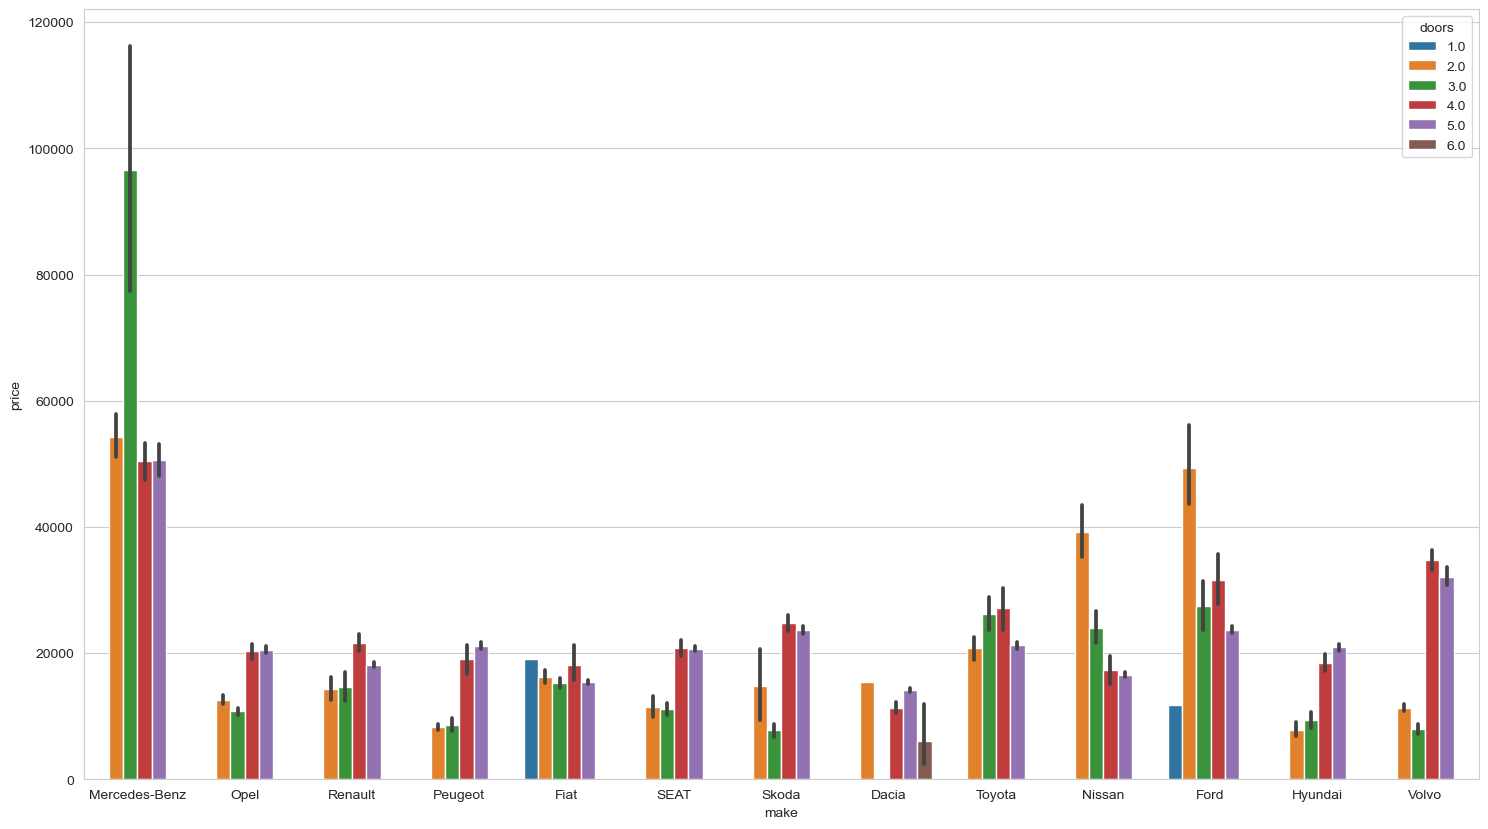

In [62]:
plt.figure(figsize=(18,10))
sns.barplot(x = df.make, y = df.price, hue= df.doors)

In [63]:
df.columns[9]

'country_version'

In [64]:
df.drop("country_version", axis=1, inplace=True)

In [65]:
df.columns[10]

'warranty'

In [66]:
df.drop("offer_number", axis=1, inplace=True)

In [67]:
df.columns[11]

'first_registration'

In [68]:
df.warranty.isna().sum()

13696

In [69]:
df.warranty=df.warranty.apply(str_splitter).str.replace('months','')

In [70]:
df.warranty.value_counts(dropna=False)

NaN      13696
 12       9545
 Yes      2319
 24       1515
 60        968
 6         398
 36        257
 3         185
 0         133
 48         78
 84         47
 72         40
 13         22
 8          19
 18         15
 1          15
 15         13
 14         13
 16         13
 30         12
 34         11
 21         11
 33         11
 32          9
 20          9
 23          9
 19          9
 17          9
 35          8
 28          8
 50          6
 22          6
 42          5
 31          4
 26          4
 52          4
 47          4
 9           4
 25          3
 58          3
 11          3
 27          3
 45          2
 53          2
 10          2
 57          2
 51          2
 29          2
 2           2
 80          2
 90          2
 7           2
 46          1
 117         1
 43          1
 65          1
 39          1
 142         1
 110         1
 37          1
 49          1
 55          1
 99          1
 122         1
 44          1
 4           1
Name: warr

In [71]:
df.columns[12]

'gearbox'

In [72]:
df.mileage

0        120,200 km
1          5,000 km
2         18,900 km
3         18,995 km
4        197,000 km
            ...    
29475    145,000 km
29476     96,000 km
29477     94,343 km
29478    230,047 km
29479           NaN
Name: mileage, Length: 29480, dtype: object

In [73]:
df.mileage = df.mileage.str.replace(',','').str.replace(' km','')

In [74]:
df.mileage = df.mileage.astype('float')

In [75]:
df.mileage.value_counts()

10.00        586
1.00         172
50.00        133
100.00       119
5000.00      118
            ... 
141589.00      1
59821.00       1
123500.00      1
29781.00       1
230047.00      1
Name: mileage, Length: 14183, dtype: int64

In [76]:
df.columns[13]

'fuel_type'

In [77]:
df.columns[14]

'colour'

In [78]:
df.gearbox

0           [\nManual\n]
1        [\nAutomatic\n]
2        [\nAutomatic\n]
3        [\nAutomatic\n]
4        [\nAutomatic\n]
              ...       
29475    [\nAutomatic\n]
29476       [\nManual\n]
29477    [\nAutomatic\n]
29478    [\nAutomatic\n]
29479                NaN
Name: gearbox, Length: 29480, dtype: object

In [79]:
df.gearbox = df.gearbox.explode().str.strip()
df.gearbox

0           Manual
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
29475    Automatic
29476       Manual
29477    Automatic
29478    Automatic
29479          NaN
Name: gearbox, Length: 29480, dtype: object

In [80]:
df.columns[15]

'paint'

In [81]:
df.fuel_type.value_counts()

Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                                   555
Super 95 (Particle filter)                                                                             537
Super E10 95 (Particle filter)                                                                         324
Regular/Benzine E10 91               

In [82]:
df.columns[16]

'desc'

In [83]:
df.colour.value_counts(dropna=False)

Black     6473
Grey      5998
White     5185
Blue      3478
NaN       2574
Red       2242
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: colour, dtype: int64

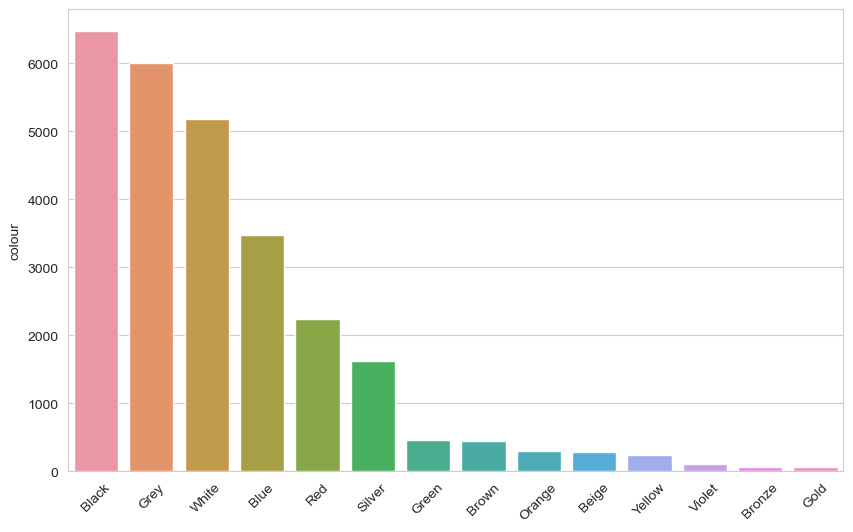

In [84]:
sns.barplot(x= df.colour.value_counts(dropna=False).index, y =df.colour.value_counts(dropna=False) )
plt.xticks(rotation =45);

In [85]:
df.drop("colour", axis=1, inplace=True)

In [86]:
df.columns[17]

'seats'

In [87]:
df.drop("paint", axis=1, inplace=True)

In [88]:
df.columns[18]

'engine_size'

In [89]:
df.drop("desc", axis=1, inplace=True)

In [90]:
df.columns[19]

'co_emissions'

In [91]:
df.columns[20]

'manufacturer_colour'

In [92]:
df.seats.value_counts(dropna=False)

[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3975
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: seats, dtype: int64

In [93]:
df.seats = df.seats.apply(str_splitter)

In [94]:
df.seats.value_counts(dropna=False)

 5     18308
 4      5390
NaN     3975
 2      1186
 7       488
 8        43
 9        35
 3        25
 6        12
 0         9
 1         7
 17        2
Name: seats, dtype: int64

In [95]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'warranty', 'mileage',
       'first_registration', 'gearbox', 'fuel_type', 'seller', 'seats',
       'power', 'engine_size', 'gears', 'co_emissions', 'manufacturer_colour',
       'drivetrain', 'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership',
  

In [96]:
df.columns[21]

'drivetrain'

In [97]:
df.power.value_counts(dropna=False)

[\n110 kW (150 hp)\n]      1992
NaN                        1422
[\n96 kW (131 hp)\n]       1356
[\n88 kW (120 hp)\n]       1182
[\n81 kW (110 hp)\n]       1166
                           ... 
[\n746 kW (1,014 hp)\n]       1
[\n570 kW (775 hp)\n]         1
[\n471 kW (640 hp)\n]         1
[\n179 kW (243 hp)\n]         1
[\n26 kW (35 hp)\n]           1
Name: power, Length: 352, dtype: int64

In [98]:
df.power

0                          NaN
1        [\n215 kW (292 hp)\n]
2        [\n310 kW (421 hp)\n]
3        [\n225 kW (306 hp)\n]
4        [\n100 kW (136 hp)\n]
                 ...          
29475    [\n125 kW (170 hp)\n]
29476     [\n84 kW (114 hp)\n]
29477    [\n187 kW (254 hp)\n]
29478    [\n147 kW (200 hp)\n]
29479                      NaN
Name: power, Length: 29480, dtype: object

In [99]:
df.power.astype("str").apply(lambda x : re.findall("([,0-9]+)",x)[0] if len(re.findall("([,0-9]+)",x))>0 else np.nan).str.replace(",","").astype(float)

0          NaN
1       215.00
2       310.00
3       225.00
4       100.00
         ...  
29475   125.00
29476    84.00
29477   187.00
29478   147.00
29479      NaN
Name: power, Length: 29480, dtype: float64

In [100]:
df.power = df.power.astype("str").apply(lambda x : re.findall("([,0-9]+)",x)[0] if len(re.findall("([,0-9]+)",x))>0 else np.nan).str.replace(",","").astype(float)

In [101]:
df.power.value_counts(dropna=False)

110.00    1992
NaN       1422
96.00     1356
88.00     1182
81.00     1166
          ... 
746.00       1
570.00       1
471.00       1
179.00       1
26.00        1
Name: power, Length: 352, dtype: int64

In [102]:
df.drop("power", axis=1, inplace=True)

In [103]:
df.columns[22]

'fuel_consumption'

In [104]:
df.engine_size.dtypes

dtype('O')

In [105]:
df.engine_size.value_counts(dropna=False)

NaN               2253
[\n1,598 cc\n]    2099
[\n999 cc\n]      2068
[\n1,969 cc\n]    1929
[\n1,461 cc\n]    1110
                  ... 
[\n2,753 cc\n]       1
[\n2,495 cc\n]       1
[\n200 cc\n]         1
[\n3,224 cc\n]       1
[\n2,473 cc\n]       1
Name: engine_size, Length: 468, dtype: int64

In [106]:
#df.engine_size = df.engine_size.explode().str.strip()
#df['engine_size'] = df.engine_size.str.extract('(\d+\,\d+)')
#df['engine_size'] = df.engine_size.str.replace(',','').apply(pd.to_numeric, errors='ignore')

In [107]:
df.engine_size = df.engine_size.astype("str").apply(lambda x : re.findall("([,0-9]+)",x)[0] if len(re.findall("([,0-9]+)",x))>0 else np.nan).str.replace(",","").astype("float")

In [108]:
df.columns[23]

'comfort_&_convenience'

In [109]:
df.gears.dtypes

dtype('O')

In [110]:
df.gears.value_counts(dropna=False)

NaN         10526
[\n6\n]      8412
[\n5\n]      5335
[\n7\n]      1738
[\n8\n]      1690
[\n1\n]       712
[\n9\n]       642
[\n4\n]       256
[\n10\n]      112
[\n0\n]        31
[\n3\n]        24
[\n2\n]         2
Name: gears, dtype: int64

In [111]:
#df['gears'] = df.gears.str.extract("(\d)")
#df['gears'] = df['gears'].apply(pd.to_numeric, errors='ignore')

In [112]:
df.gears = df.gears.astype("str").apply(lambda x : re.findall("[0-9]+",x)[0] if len(re.findall("[0-9]+",x))>0 else np.nan).astype(float)

In [113]:
df.columns[24]

'entertainment_&_media'

In [114]:
df.co_emissions.dtypes

dtype('O')

In [115]:
df.co_emissions.value_counts(dropna=False)

NaN                  10886
0 g/km (comb.)        1038
119 g/km (comb.)       393
124 g/km (comb.)       340
129 g/km (comb.)       319
                     ...  
7 g/km (comb.)           1
80 g/km (comb.)          1
196  g/km (comb.)        1
100  g/km (comb.)        1
53 g/km (comb.)          1
Name: co_emissions, Length: 348, dtype: int64

In [116]:
df['co_emissions'] = df['co_emissions'].str.extract(r'(\d+)').astype(float)
df.co_emissions

0          NaN
1         0.00
2          NaN
3          NaN
4          NaN
         ...  
29475   217.00
29476    99.00
29477   149.00
29478   251.00
29479      NaN
Name: co_emissions, Length: 29480, dtype: float64

In [117]:
df.co_emissions.value_counts(dropna=False)

NaN       10886
0.00       1040
119.00      393
124.00      340
129.00      319
          ...  
332.00        1
70.00         1
338.00        1
342.00        1
53.00         1
Name: co_emissions, Length: 327, dtype: int64

In [118]:
df.columns[25]

'safety_&_security'

In [119]:
df.manufacturer_colour.dtypes

dtype('O')

In [120]:
df.manufacturer_colour.value_counts(dropna=False)

NaN                               7693
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: manufacturer_colour, Length: 4964, dtype: int64

In [121]:
df['manufacturer_colour'] = df['manufacturer_colour'].str.lower()

In [122]:
df.manufacturer_colour = df.manufacturer_colour.replace({"-":np.nan})

In [123]:
df.manufacturer_colour.value_counts(dropna=False)

NaN                             7813
blanco                          1329
gris                             721
negro                            590
azul                             584
                                ... 
colore esterno (bronzo met.)       1
grafito                            1
negro mtl                          1
rojo passione                      1
demin blue                         1
Name: manufacturer_colour, Length: 4177, dtype: int64

In [124]:
df.drop("manufacturer_colour", axis=1, inplace=True)

In [125]:
df.columns[26]

'empty_weight'

In [126]:
df.drivetrain.dtypes

dtype('O')

In [127]:
df.drivetrain.value_counts(dropna=False)

NaN                12587
[\n, Front, \n]    12066
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: drivetrain, dtype: int64

In [128]:
#df.drivetrain = df.drivetrain.explode().str.strip()

In [129]:
df.drivetrain = df.drivetrain.apply(str_splitter)

In [130]:
df.drivetrain.value_counts(dropna=False)

NaN       12587
 Front    12066
 4WD       3252
 Rear      1575
Name: drivetrain, dtype: int64

In [131]:
df.columns[27]

'model_code'

In [132]:
df.cylinders.dtypes

dtype('O')

In [133]:
df.cylinders = df.cylinders.astype(str).apply(lambda x: re.findall("[0-9]+",x)[0] if len(re.findall("[0-9]+",x))>0 else np.nan).astype(float)

In [134]:
df.cylinders.value_counts(dropna=False)

4.00     13068
NaN      10628
3.00      3258
6.00      1013
5.00       799
8.00       539
2.00       103
0.00        35
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: cylinders, dtype: int64

In [135]:
df.columns[28]

'general_inspection'

In [136]:
df.fuel_consumption.dtypes

dtype('O')

In [137]:
df.fuel_consumption.value_counts(dropna=False)

NaN                                                                            6095
[[0 l/100 km (comb.)]]                                                          330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]             306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]       170
[[4 l/100 km (comb.)]]                                                          149
                                                                               ... 
[[14.2 l/100 km (comb.)], [21.3 l/100 km (city)], [10 l/100 km (country)]]        1
[[3.5 l/100 km (comb.)], [4.4 l/100 km (city)], [2.9 l/100 km (country)]]         1
[[4.5 l/100 km (comb.)], [6.2 l/100 km (city)], [3.5 l/100 km (country)]]         1
[[4.9 l/100 km (comb.)], [99.9 l/100 km (city)], [98 l/100 km (country)]]         1
[[10.4 l/100 km (comb.)], [15.3 l/100 km (city)], [7.6 l/100 km (country)]]       1
Name: fuel_consumption, Length: 3453, dtype: int64

In [138]:
def combined(x):
    if type(x) == list and len(x) >= 1:
        if x[0] != []:
            return x[0][0]
        else:
            return None
    else:
        return None

In [139]:
def city(x):
    if type(x) == list and len(x) >= 2:
        if x[1] != []:
            return x[1][0]
        else:
            return None
    else:
        return None

In [140]:
def country(x):
    if type(x) == list and len(x) >= 3:
        if x[2] != []:
            return x[2][0]
        else:
            return None
    else:
        return None

In [141]:

df["combined_fuel_cons"] = df.fuel_consumption.apply(combined).str.extract('(\S+)').astype("float")

In [142]:
df.combined_fuel_cons.value_counts(dropna=False)

NaN      6095
5.00      831
4.90      812
4.50      690
0.00      652
5.10      647
4.70      618
5.40      609
4.80      609
5.60      594
4.30      564
5.30      558
5.20      552
4.60      550
4.20      539
4.10      518
3.80      516
5.70      504
5.50      503
5.90      498
4.00      484
4.40      442
6.40      438
6.00      430
6.30      414
5.80      399
3.70      360
3.90      353
3.60      327
7.00      312
3.40      296
6.50      292
6.10      282
6.20      278
6.60      274
6.90      270
7.40      265
7.10      253
6.70      251
6.80      226
7.30      220
7.20      202
8.40      194
8.00      194
7.60      181
3.50      180
8.20      166
7.70      165
7.80      165
7.50      156
12.00     110
3.30      109
9.00      107
9.20      103
12.50     102
8.60       95
9.80       93
8.90       92
8.30       88
3.00       84
7.90       83
9.60       79
8.70       79
1.70       77
9.50       77
1.50       73
9.40       72
9.70       69
8.80       69
8.50       67
10.10      66
1.80  

In [143]:
df.drop("fuel_consumption", axis=1, inplace=True)

In [144]:
df.columns[29]

'full_service_history'

In [145]:
df.columns[30]

'non_smoker_vehicle'

In [146]:
df.columns[31]

'emission_class'

In [147]:
df.columns[32]

'emissions_sticker'

In [148]:
df.extras = [",".join(i) if type(i) == list else i for i in df.extras]

In [149]:
df.extras.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                 6000
Alloy wheels                                                                                                                                                                                                                                                        3408
Alloy wheels, Roof rack                                                                                                                                                                                                                                              380
Alloy wheels, Sport seats                                                                                                                                                                                    

In [150]:
df.columns[33]

'upholstery_colour'

In [151]:
df['empty_weight']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4        [\n1,545 kg\n]
              ...      
29475    [\n1,357 kg\n]
29476    [\n1,356 kg\n]
29477    [\n1,617 kg\n]
29478    [\n1,573 kg\n]
29479               NaN
Name: empty_weight, Length: 29480, dtype: object

In [152]:
df.empty_weight = df.empty_weight.astype(str).apply(lambda x : re.findall("[,0-9]+",x)[0] if len(re.findall("[,0-9]+",x))>0 else np.nan).str.replace(",","").astype(float)

In [153]:
df.empty_weight.value_counts(dropna=False)

NaN        11722
1395.00      233
1055.00      224
1423.00      216
1165.00      200
           ...  
1877.00        1
1011.00        1
1069.00        1
983.00         1
1391.00        1
Name: empty_weight, Length: 1219, dtype: int64

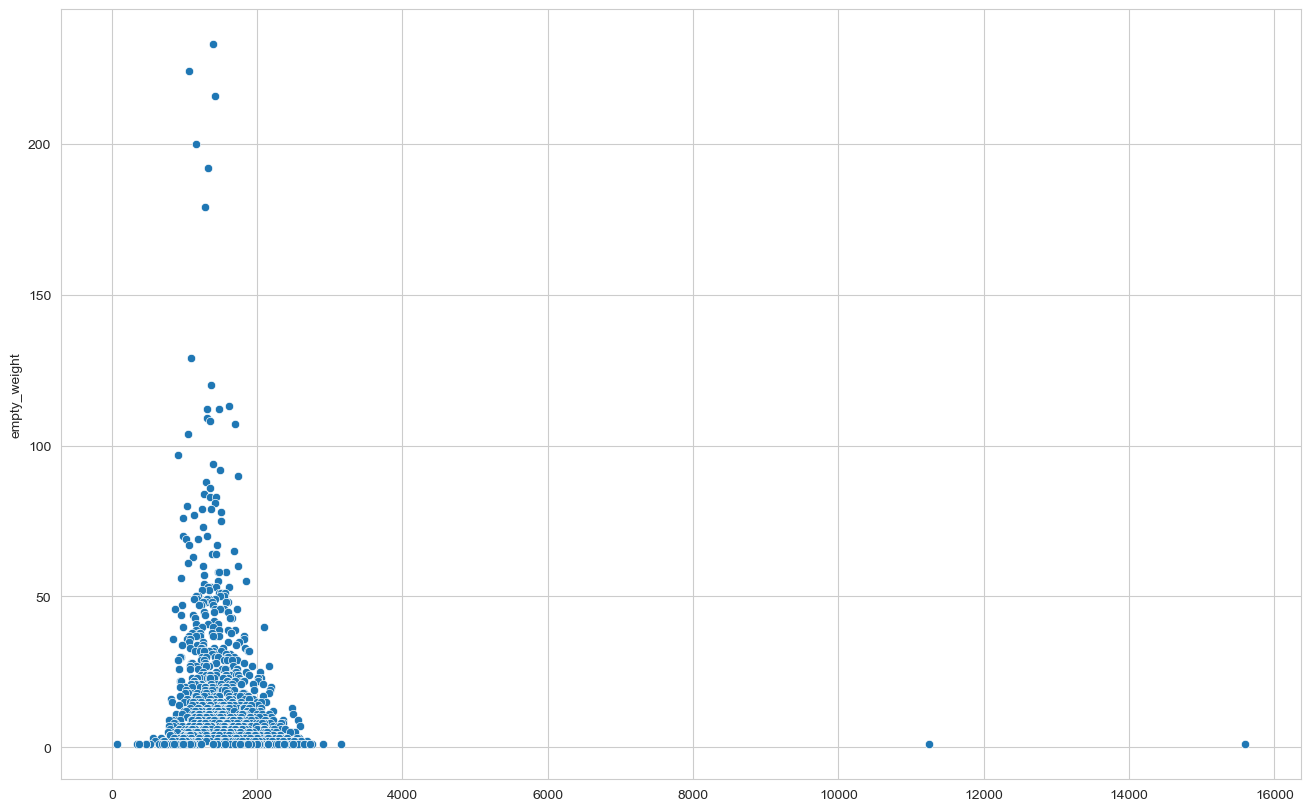

In [154]:
plt.figure(figsize =(16,10))
sns.scatterplot(x=df.empty_weight.value_counts(dropna=False).index, y=df.empty_weight.value_counts(dropna=False));

In [155]:
df.columns[34]

'upholstery'

In [156]:
df.drop("model_code", axis=1, inplace=True)

In [157]:
df.columns[35]

'previous_owner'

In [158]:
df.general_inspection.value_counts(dropna=False)

NaN        17226
New         5883
05/2023      286
08/2023      280
03/2023      268
06/2023      266
04/2023      262
09/2023      255
07/2023      254
06/2024      216
05/2024      212
01/2023      210
02/2023      209
03/2024      207
07/2024      203
08/2024      187
09/2024      182
11/2023      176
01/2024      164
02/2024      163
04/2024      162
12/2023      160
12/2022      159
10/2023      155
06/2025      147
11/2022      131
08/2025      122
07/2025      110
09/2022       96
03/2025       95
05/2025       93
10/2022       90
04/2025       89
01/2025       75
02/2025       66
09/2025       65
10/2024       64
08/2022       64
12/2024       61
11/2024       50
06/2022       42
07/2022       41
04/2022       34
03/2022       25
05/2022       22
10/2021       17
11/2021       11
01/2022       10
07/2021       10
09/2021        8
08/2021        7
12/2021        7
02/2022        6
05/2026        5
07/2020        5
10/2025        4
05/2021        4
06/2026        4
12/2019       

In [159]:
df.drop("general_inspection", axis=1, inplace=True)

In [160]:
df.columns[36] 

'power_consumption'

In [161]:
df.drop("last_service", axis=1, inplace=True)

In [162]:
df.columns[37]

'co_efficiency'

In [163]:
df['full_service_history'].isnull().sum()/len(df['full_service_history'])*100

57.377883310719135

In [164]:
df["full_service_history"].replace(np.nan, "No", inplace=True)

In [165]:
df.full_service_history.value_counts(dropna=False).astype(float)

No    16915.00
Yes   12565.00
Name: full_service_history, dtype: float64

In [166]:
df.columns[38]

'fuel_consumption_wltp'

In [167]:
df.non_smoker_vehicle.value_counts(dropna=False).astype(float)

NaN   17886.00
Yes   11594.00
Name: non_smoker_vehicle, dtype: float64

In [168]:
df.drop("non_smoker_vehicle", axis=1, inplace=True)

In [169]:
df.columns[39]

'available_from'

In [170]:
df.emission_class.value_counts(dropna=False)

NaN             11621
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: emission_class, dtype: int64

In [171]:
df.replace({"emission_class" : {"Euro 6c":"6","Euro 6":"6","Euro 6d-TEMP":"6","Euro 6d":"6", "Euro 5":"5", "Euro 4":"4","Euro 3":"3","Euro 2":"2","Euro 1":"1"}}, regex = True, inplace = True)


In [172]:
df.emission_class.value_counts(dropna=False)

NaN        11621
6           6558
6d-TEMP     3399
6d          2858
5           2389
4           1743
3            523
2            217
1            172
Name: emission_class, dtype: int64

In [173]:
df.drop("emission_class", axis=1, inplace=True)

In [174]:
df.columns[40]

'availability'

In [175]:
df.emissions_sticker = df.emissions_sticker.astype(str).apply(lambda x : re.findall("[0-9]+",x)[0] if len(re.findall("[0-9]+",x))>0 else np.nan).astype(float)

In [176]:
df.emissions_sticker.value_counts(dropna=False)

NaN     20066
4.00     9230
1.00      176
3.00        6
2.00        2
Name: emissions_sticker, dtype: int64

In [177]:
df.drop("emissions_sticker", axis=1, inplace=True)

In [178]:
df.columns[41]

'electric_range_wltp'

In [179]:
df.upholstery_colour.value_counts(dropna=False)

NaN       14911
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: upholstery_colour, dtype: int64

In [180]:
df.drop("upholstery_colour", axis=1, inplace=True)

In [181]:
df.columns[42]

'battery_ownership'

In [182]:
df.upholstery.sample(10)

1251     Full leather
12834    Full leather
22841    Part leather
4221            Cloth
12676           Cloth
24169           Cloth
26342             NaN
1667     Full leather
11245           Cloth
28473    Full leather
Name: upholstery, dtype: object

In [183]:
df.upholstery.value_counts(dropna=False)

NaN             10870
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: upholstery, dtype: int64

# production_date

In [218]:
df.columns[43]

IndexError: index 43 is out of bounds for axis 0 with size 33

In [185]:
first_looking(df, "production_date")

column name    :  production_date
--------------------------------
per_of_nulls   :  % 79.96
num_of_nulls   :  23572
num_of_uniques :  50
shape_of_df    :  (29480, 45)
--------------------------------
NaN        23572
2019.00     1179
2021.00      980
2022.00      894
2020.00      763
2018.00      762
2017.00      391
2016.00      239
2015.00      118
2014.00       90
2013.00       76
2010.00       53
2012.00       43
2011.00       43
2008.00       34
2009.00       26
2007.00       20
2006.00       17
2002.00       15
2004.00       13
2003.00       13
1967.00       12
2001.00       12
1966.00       11
1999.00        9
2005.00        9
1965.00        9
1970.00        9
1997.00        8
1994.00        8
1968.00        7
2000.00        7
1998.00        5
1990.00        3
1973.00        3
1987.00        3
1993.00        3
1991.00        3
1996.00        3
1995.00        2
1969.00        2
1978.00        2
1982.00        2
1961.00        1
1954.00        1
1988.00        1
1962.00        1


**Let's check the compatibility of the values in the ``first_registration`` with the ones in the ``production_date`` column:**

In [186]:
df[(df["first_registration"].notnull()) &\
   (df["production_date"].notnull()) &\
   (df["first_registration"]!=df["production_date"])]\
    [["first_registration", "production_date"]]

,first_registration,production_date
8,06/2019,2019.00
16,03/2021,2021.00
23,01/2019,2018.00
27,03/2014,2014.00
30,07/2020,2018.00
...,...,...
29436,01/2022,2021.00
29437,04/2022,2022.00
29438,09/2021,2021.00
29447,03/2022,2022.00


In [187]:
df.columns[44]

'combined_fuel_cons'

In [217]:
first_looking(df, "previous_owner")

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 6.77
num_of_nulls   :  160
num_of_uniques :  5
shape_of_df    :  (2364, 33)
--------------------------------
1      1704
2       434
NaN     160
3        59
4         7
Name: previous_owner, dtype: int64


In [189]:
df["previous_owner"] = df["previous_owner"].str[1]
df["previous_owner"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29475    NaN
29476      1
29477    NaN
29478      5
29479    NaN
Name: previous_owner, Length: 29480, dtype: object

In [190]:
# df.previous_owner= df.previous_owner.apply(lambda x : x[1] if type(x)==list else np.nan).astype(float)

In [191]:
df.previous_owner.value_counts(dropna=False) 

NaN    15465
1       9746
2       3221
3        699
4        184
5         69
6         37
7         22
8         16
9         14
12         3
10         2
14         1
13         1
Name: previous_owner, dtype: int64

# other_fuel_types ..drop

In [192]:
df.drop("other_fuel_types", axis=1, inplace=True)

# power_consumption ..drop

In [193]:
df.drop("power_consumption", axis=1, inplace=True)

# energy_efficiency_class

In [194]:
first_looking(df, "energy_efficiency_class")

column name    :  energy_efficiency_class
--------------------------------
per_of_nulls   :  % 73.53
num_of_nulls   :  21676
num_of_uniques :  11
shape_of_df    :  (29480, 43)
--------------------------------
NaN     21676
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: energy_efficiency_class, dtype: int64


In [195]:
efficient = ["A", "A+", "A++", "A+++", "B"]
unefficient = ["C", "D", "E", "F", "G"]

def energyefficiency(x):
    if x in efficient:
        return "efficient"
    elif x in unefficient:
        return "unefficient"    
    else:
        return x

df["energy_efficiency_class"] = df["energy_efficiency_class"].apply(energyefficiency)

In [196]:
df.energy_efficiency_class.value_counts(dropna=False)

NaN            21676
efficient       5308
unefficient     2496
Name: energy_efficiency_class, dtype: int64

# co_efficiency..drop

In [197]:
df.drop("co_efficiency", axis=1, inplace=True)

# fuel_consumption_wltp ..drop

In [198]:
df.drop("fuel_consumption_wltp", axis=1, inplace=True)

# co_emissions_wltp ..drop

In [199]:
df.drop("co_emissions_wltp", axis=1, inplace=True)

# available_from ..drop

In [200]:
df.drop("available_from", axis=1, inplace=True)

# taxi_or_rental_car ..drop

In [201]:
df.drop("taxi_or_rental_car", axis=1, inplace=True)

# availability ..drop

In [202]:
df.drop("availability", axis=1, inplace=True)

# last_timing_belt_change ..drop

In [203]:
df.drop("last_timing_belt_change", axis=1, inplace=True)

# electric_range_wltp ..drop

In [204]:
df.drop("electric_range_wltp", axis=1, inplace=True)

# power_consumption_wltp ..drop

In [205]:
df.drop("power_consumption_wltp", axis=1, inplace=True)

# battery_ownership ..drop

In [206]:
df.drop("battery_ownership", axis=1, inplace=True)

missing

In [207]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    missing = missing.loc[lambda x : x >= limit]
    if missing.empty:
        return "No columns have missing values that exceed the given limit."
    else:
        return missing

def show_missing_values(limit):
    return df_nans(df, limit)

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [208]:
drop_columns = df_nans(df, 80).index
drop_columns

<function str.index>

In [209]:
df.astype(str).duplicated(keep=False).sum()

4686

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  float64
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  float64
 9   warranty                 15784 non-null  object 
 10  mileage                  28629 non-null  float64
 11  first_registration       28628 non-null  object 
 12  gearbox                  28382 non-null  object 
 13  fuel_type                26843 non-null  object 
 14  seller                

In [211]:
df.dropna(subset=['combined_fuel_cons'], inplace=True)

In [212]:
df.dropna(subset=['warranty'], inplace=True)

In [213]:
df.dropna(subset=['production_date'], inplace=True)

In [214]:
df.dropna(subset=['energy_efficiency_class'], inplace=True)

In [215]:
df.info

<bound method DataFrame.info of                  make_model  \
403     Mercedes-Benz E 400   
408    Mercedes-Benz AMG GT   
415     Mercedes-Benz C 400   
418    Mercedes-Benz AMG GT   
426    Mercedes-Benz AMG GT   
...                     ...   
29334             Volvo S60   
29380             Volvo S90   
29394             Volvo S90   
29414             Volvo S60   
29438             Volvo S60   

                                       short_description           make  \
403    d 4M AMG/Com/ILS/Distr/KeyG/360/Standh/ABC Autom.  Mercedes-Benz   
408    Mercedes- Keramik/Carbon/Burmester/Night Distr...  Mercedes-Benz   
415    AMG/Comand/Distr/KeyGO/Sitzklima/Memory Distronic  Mercedes-Benz   
418       Roadster COMAND/Burmester/Memory/Kamera Autom.  Mercedes-Benz   
426       GT S Roadster KAMERA+BURMESTER+MEMORY+AIRSCARF  Mercedes-Benz   
...                                                  ...            ...   
29334  R Design B5 Benzin EU6d LED Navi StandHZG Keyless          Volv

In [216]:
df.to_csv('autoscout_cleaned.csv', index=False)